<a href="https://colab.research.google.com/github/arshad62/1stwebpage/blob/master/2_langraph_lecture_2/LangGraph_Lec_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What we will cover in this lecture:
- Chaining
- Router
- Agents

# Chaining

## Goals

Now, let's build up to a simple chain that combines 4 [concepts](https://python.langchain.com/v0.2/docs/concepts/):

* Using [chat messages](https://python.langchain.com/v0.2/docs/concepts/#messages) as our graph state
* Using [chat models](https://python.langchain.com/v0.2/docs/concepts/#chat-models) in graph nodes
* [Binding tools](https://python.langchain.com/v0.2/docs/concepts/#tools) to our chat model
* [Executing tool calls](https://python.langchain.com/v0.2/docs/concepts/#functiontool-calling) in graph nodes

![Screenshot 2024-08-21 at 9.24.03 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dd607b08df5e1101_chain1.png)

# Chat Messages:

## Messages in LangGraph:
When you interact with a language model in LangGraph, messages are used to communicate between the user, the AI, and sometimes even tools or systems. Let's break it down step-by-step with an example.

**1. Role (Who is speaking?)**
- **User:** The person using the system (e.g., a student).
- **Assistant:** The AI responding to the user.
- **System:** Instructions that guide how the AI should respond.
- **Tool:** A message from a tool the AI has used to help with the answer.

**Example:**

- **User:** "Tell me what photosynthesis is."
- **Assistant:** "Photosynthesis is the process by which plants convert sunlight into energy."
- **System:** (You don't see this, but it might be something like "Explain scientific terms clearly.")
- **Tool:** (If the AI used a dictionary or reference tool to check the definition, it might show the result here.)

**2. Content (What is the message?)**: <br/>
The content is the actual message or text. It can be a string (simple text) or more complex information, like a list or dictionary.

**Example:**

- **User:** "Define gravity."
- **Assistant:** "Gravity is a force that pulls objects toward each other, like the Earth pulling objects toward its surface."

**3. Name (Who said it, if there are multiple people?):** <br/>
- If there are multiple users or assistants, messages may have a name to tell them apart.
**For example**, in a group chat with two students, you could have "Student 1" and "Student 2."

## Types of Messages (with Example):
**1. HumanMessage:** <br/>
This is the message from the user (you).

**Example:**

- **User:** "Explain Newton's First Law of Motion."

**2. AIMessage:**

This is the message from the assistant (the AI), which may include extra details like:

- **Response metadata:** Additional info like how many words the response used.
- **Tool calls:** If the AI uses a tool, it shows which tool and what it sent to the tool.

**Example:**

- **Assistant:** "Newton's First Law of Motion states that an object will remain at rest or move at a constant speed in a straight line unless acted upon by an external force."
- **Tool call:** If the AI used a science database to check the law, you might see a tool call like:
    - **Tool name:** "PhysicsAPI"
    - **Arguments:** "Newton's First Law of Motion"
    - **ID:** "tool12345"

**3. SystemMessage:** <br/>
These are hidden instructions telling the AI how to respond.

**Example:**

- The system might have a hidden message like "Explain answers at a 6th-grade level."

**4. ToolMessage:** <br/>
This represents the result of a tool the AI has used to answer the question.

**Example:**

- **ToolMessage:** "The PhysicsAPI tool returned: 'Newton’s First Law means no force = no change in motion.'"



In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_google_genai langchain_core langgraph

In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


# Chat Models

### What are Chat Models?

Chat models are a type of language model that take a series of **messages** as input and return a message as a response. Unlike older models (LLMs), chat models can handle different **roles** in a conversation:
- **User**: The person asking the question (e.g., a student).
- **Assistant**: The AI that provides answers.
- **System**: Instructions that guide how the AI responds.

**Example**:
- **User**: "What is the capital of France?"
- **Assistant**: "The capital of France is Paris."

### How They Work
If you provide a plain text input, LangChain automatically converts it into a **HumanMessage** and processes it through the chat model. So, you can use chat models similarly to older LLMs.



### Key Parameters

When setting up a chat model, you can control its behavior with a few important settings:
- **model**: The name of the model (e.g., GPT-4).
- **temperature**: Controls how creative the model is. Higher values = more creative responses.
- **max_tokens**: Limits the number of words the model generates.
- **stop**: Defines where the model should stop responding.
- **api_key**: Used to access the model from a third-party provider.

**Example**:
- **User**: "Tell me a creative story about a cat."
- **Assistant** (with higher temperature): "Once, a curious cat explored space, chasing stars across the sky."



### Multimodal Inputs

Some chat models can take more than just text, like images or video. For example, **Gemini** can accept videos as inputs, but this feature is still rare.

**Example**:
- You send an image of a sunset, and the model describes it: "This is a beautiful sunset over the mountains."



In [ ]:
from google.colab import userdata
google_api_key = userdata.get('GEMINI_API_KEY')

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/newkey.json"

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=google_api_key)
result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [ ]:
result

AIMessage(content="That's a great question! You're in luck, as the US has some fantastic places to see orcas, also known as killer whales.  Here are a few of the best spots, with some key considerations:\n\n**1. The San Juan Islands, Washington:**\n\n* **Pros:** This is arguably the most reliable place in the US to see orcas in the wild. The Salish Sea, which includes the San Juan Islands, is home to a resident population of orcas that frequent the area year-round.\n* **Cons:**  Whale watching tours are popular here, so expect crowds and potential for boat traffic.\n\n**2. Alaska:**\n\n* **Pros:**  Alaska offers a variety of orca viewing opportunities, from boat tours in Southeast Alaska to land-based viewing in Glacier Bay National Park.  You'll have a chance to see both resident and transient orcas.\n* **Cons:**  Alaska is a vast and remote area, so travel can be expensive and time-consuming.  Weather can be unpredictable, especially in the fall and winter.\n\n**3. California:**\n\n*

In [ ]:
result.response_metadata

{'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
 'finish_reason': 'STOP',
 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT',
   'probability': 'NEGLIGIBLE',
   'blocked': False},
  {'category': 'HARM_CATEGORY_HATE_SPEECH',
   'probability': 'NEGLIGIBLE',
   'blocked': False},
  {'category': 'HARM_CATEGORY_HARASSMENT',
   'probability': 'NEGLIGIBLE',
   'blocked': False},
  {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT',
   'probability': 'NEGLIGIBLE',
   'blocked': False}]}

## Tools

### What is a Tool?

In LangChain, **tools** are used when a language model needs to interact with an external system, like an API. Tools help the model understand how to communicate with these systems by providing the necessary input formats, such as schemas or payloads, instead of just natural language.

For example, if you want the model to get weather information from a weather API, you would bind the API as a **tool**. The model will then know how to format its request according to the API's requirements and return the output in the correct format.

### How Tools Work:
1. **User Input**: The user asks the model for something, like "What's the weather in New York?"
2. **Tool Call**: The model recognizes that it needs to use a tool (the weather API) and formats the request based on the tool's schema.
3. **Tool Output**: The API returns the response, which the model then delivers back to the user.

### Example:

Let’s say we bind a weather API as a tool. The model will use it like this:

- **User**: "What's the weather in New York?"
- **Model (via tool)**: Calls the weather API with the correct schema.
- **Tool output**: "The weather in New York is 75°F and sunny."
  
### Using Tools in LangChain:

In LangChain, integrating tools is simple. You can bind a Python function or external system to the model using `ChatModel.bind_tools()`.

```python
from langchain_core.models import ChatModel

# Example of a tool (Python function)
def get_weather(location):
    return f"The weather in {location} is 75°F and sunny."

# Bind the tool to the model
model = ChatModel.bind_tools(get_weather)

# Use the tool in a conversation
user_input = "What is the weather in New York?"
output = model.run(user_input)
print(output)  # The weather in New York is 75°F and sunny.
```

### Why Tools are Important:
- **Extend model capabilities**: Tools allow language models to fetch real-time information or perform actions that go beyond text generation.
- **Schema-based communication**: Tools ensure that models interact with external systems using the right format, making it more reliable.

Many LLM providers support tool-calling, and LangChain makes it easy to bind tools to models and integrate them into conversations. This is particularly useful when dealing with APIs or other structured data formats.

[Many LLM providers support tool calling](https://python.langchain.com/v0.1/docs/integrations/chat/) and [tool calling interface](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) in LangChain is simple.

You can simply pass any Python `function` into `ChatModel.bind_tools(function)`.

![Screenshot 2024-08-19 at 7.46.28 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dc1c17a7a57f9960_chain2.png)

This `multiply` function is our tool call

In [ ]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

If we pass an input - e.g., `"What is 2 multiplied by 3"` - we see a tool call returned.

The tool call has specific arguments that match the input schema of our function along with the name of the function to call.

```
{'arguments': '{"a":2,"b":3}', 'name': 'multiply'}
```

In [ ]:
function_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")])
function_call

{'name': 'multiply', 'description': 'Multiply a and b.\n\n    Args:\n        a: first int\n        b: second int', 'parameters': {'type_': 6, 'description': 'Multiply a and b.\n\nArgs:\n    a: first int\n    b: second int', 'properties': {'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': '{"a": 2.0, "b": 3.0}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-cb22bb89-f01a-4368-8f89-a58ecfa288e7-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2.0, 'b': 3.0}, 'id': 'e7ff741f-6565-42f0-85ec-9cf317a8d5bf', 'type': 'tool_call'}], usage_metadata={'input_tokens': 71, 'output_tokens': 18, 'total_tokens': 89})

In [ ]:
function_call.additional_kwargs['function_call']

{'name': 'multiply', 'arguments': '{"a": 2.0, "b": 3.0}'}

## Using messages as state

With these foundations in place, we can now use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages) in our graph state.

Let's define our state, `MessagesState`, as a `TypedDict` with a single key: `messages`.

`messages` is simply a list of messages, as we defined above (e.g., `HumanMessage`, etc).

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]

## Reducers

Now, we have a minor problem!

As we discussed, each node will return a new value for our state key `messages`.

But, this new value will [will override](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) the prior `messages` value.

As our graph runs, we want to **append** messages to our `messages` state key.

We can use [reducer functions](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) address this.

Reducers allow us to specify how state updates are performed.

If no reducer function is specified, then it is assumed that updates to the key should *override it* as we saw before.

But, to append messages, we can use the pre-built `add_messages` reducer.

This ensures that any messages are appended to the existing list of messages.

We annotate simply need to annotate our `messages` key with the `add_messages` reducer function as metadata.

In [ ]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

Since having a list of messages in graph state is so common, LangGraph has a pre-built [`MessagesState`](https://langchain-ai.github.io/langgraph/concepts/low_level/#messagesstate)!

`MessagesState` is defined:

* With a pre-build single `messages` key
* This is a list of `AnyMessage` objects
* It uses the `add_messages` reducer

We'll usually use `MessagesState` because it is less verbose than defining a custom `TypedDict`, as shown above.

In [ ]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built
    pass

To go a bit deeper, we can see how the `add_messages` reducer works in isolation.

In [ ]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='2aa6291e-b7e2-4e50-bbeb-7879f4952684'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='5ab70ee6-aab1-49c4-847b-7d8d6015b360'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='6016ad35-ba66-46bb-bd09-bc67cd7b6506')]

## Our graph

Now, lets use `MessagesState` with a graph.

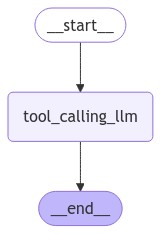

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

If we pass in `Hello!`, the LLM responds without any tool calls.

In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
for m in messages['messages']:
    m.pretty_print()

{'name': 'multiply', 'description': 'Multiply a and b.\n\n    Args:\n        a: first int\n        b: second int', 'parameters': {'type_': 6, 'description': 'Multiply a and b.\n\nArgs:\n    a: first int\n    b: second int', 'properties': {'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hello! 👋 How can I help you today?


In [ ]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3")})
for m in messages['messages']:
    m.pretty_print()

{'name': 'multiply', 'description': 'Multiply a and b.\n\n    Args:\n        a: first int\n        b: second int', 'parameters': {'type_': 6, 'description': 'Multiply a and b.\n\nArgs:\n    a: first int\n    b: second int', 'properties': {'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (5937c612-86b0-431c-9dde-255c423e005b)
 Call ID: 5937c612-86b0-431c-9dde-255c423e005b
  Args:
    b: 3.0
    a: 2.0


# Router

### What is a Router in LangGraph?

In LangGraph, a **Router** is a mechanism that decides whether a language model should respond directly to the user or call a tool to provide the answer. This decision is based on the user’s input, so the model can "route" between two actions:
1. **Returning a natural language response**.
2. **Calling a tool** (like an API) to gather more information before responding.

### Example:

Imagine you're interacting with an AI, and you ask:
- **User**: "What is the weather in New York?"

The **Router** can:
- Either **return a direct response**: "The weather is nice today."
- Or **call a weather tool** to get real-time data from an API and return a more accurate answer: "It’s 75°F and sunny in New York."

### Goals of a Router:

1. **Call a tool** when the user asks for external information.
2. **Respond naturally** when the information is already available.


### Extending the Graph:

To make the router work effectively, you need to add two key components:

1. **Node for calling the tool**: This node in the graph will represent where the model goes if it needs to call a tool, like a weather API.
   
2. **Conditional edge**: This edge will check the model’s output. If the model decides to call a tool, it routes the flow to the tool node; otherwise, it ends with a direct response.

### Example in Action:

1. **User**: "What’s the capital of France?"
   - Since the model knows this answer, it returns a **direct response**: "The capital of France is Paris."

2. **User**: "What’s the current weather in Paris?"
   - The router recognizes that it doesn’t have the current weather information, so it **calls the weather API tool** and returns: "It’s 68°F and cloudy in Paris."


### Visualization:

Imagine a flowchart (like the one in the image):
- At the top is the **user input**.
- The **router** decides whether to follow the path to a **direct response** or to call a **tool**.
- If it’s a tool call, the tool provides the needed information, and then the model gives the final response to the user.

---

### Who Decides the Path?

The **LLM (Large Language Model)** doesn’t directly decide the path. Instead, it generates an output based on the user's input. The **edges** in LangGraph decide the path by interpreting that output and routing the conversation flow.

### LLM's Role

- The LLM processes the user's input and creates an **output**.
- This output can either be a **direct response** or an indication that a tool (like an API) needs to be called.

### Edges' Role

- The edges evaluate the LLM's output and make the decision:
  - If the LLM can answer directly, the edge routes the flow to a **response node**.
  - If a tool is needed, the edge directs the flow to a **tool-calling node**.

### Example

1. **User**: "What's the weather in New York?"
2. **LLM Output**: "I need to call a weather API tool."
3. **Edges**: Detect that a tool call is needed and route to the tool node.
4. **Tool**: Calls the weather API and returns the information.

### Summary

- **LLM**: Generates the output.
- **Edges**: Decide whether to respond directly or call a tool.

The edges ensure that the flow of the conversation is properly managed based on the LLM's output.

This is an simple example of an agent, where the LLM is directing the control flow either by calling a tool or just responding directly.

![Screenshot 2024-08-21 at 9.24.09 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbac6543c3d4df239a4ed1_router1.png)

Let's extend our graph to work with either output!

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
llm_with_tools = llm.bind_tools([multiply])

 We use the [built-in `ToolNode`](https://langchain-ai.github.io/langgraph/reference/prebuilt/?h=tools+condition#toolnode) and simply pass a list of our tools to initialize it.

 We use the [built-in `tools_condition`](https://langchain-ai.github.io/langgraph/reference/prebuilt/?h=tools+condition#tools_condition) as our conditional edge.

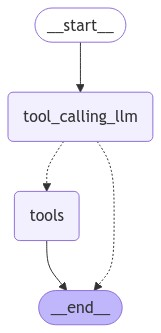

In [ ]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph import MessagesState
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)

# Add Nodes
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode([multiply]))

# Add Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Hello world.")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

{'name': 'multiply', 'description': 'Multiply a and b.\n\n    Args:\n        a: first int\n        b: second int', 'parameters': {'type_': 6, 'description': 'Multiply a and b.\n\nArgs:\n    a: first int\n    b: second int', 'properties': {'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
================================ Human Message =================================

Hello world.
================================== Ai Message ==================================

Hello! How can I help you today?


In [ ]:
from langchain_core.messages import HumanMessage
messages = [HumanMessage(content="Multiply 2 and 3.")]
messages = graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

{'name': 'multiply', 'description': 'Multiply a and b.\n\n    Args:\n        a: first int\n        b: second int', 'parameters': {'type_': 6, 'description': 'Multiply a and b.\n\nArgs:\n    a: first int\n    b: second int', 'properties': {'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
================================ Human Message =================================

Multiply 2 and 3.
================================== Ai Message ==================================
Tool Calls:
  multiply (11e5d788-abc9-4f0d-ba51-b04d53dce316)
 Call ID: 11e5d788-abc9-4f0d-ba51-b04d53dce316
  Args:
    a: 2.0
    b: 3.0
=========================

# Agents:

## Review

We built a router.

* Our chat model will decide to make a tool call or not based upon the user input
* We use a conditional edge to route to a node that will call our tool or simply end

![Screenshot 2024-08-21 at 12.44.33 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbac0ba0bd34b541c448cc_agent1.png)
## Goals

Now, we can extend this into a generic agent architecture.

In the above router, we invoked the model and, if it chose to call a tool, we returned a `ToolMessage` to the user.

But, what if we simply pass that `ToolMessage` *back to the model*?

We can let it either (1) call another tool or (2) respond directly.

This is the intuition behind [ReAct](https://react-lm.github.io/), a general agent architecture.
  
* `act` - let the model call specific tools
* `observe` - pass the tool output back to the model
* `reason` - let the model reason about the tool output to decide what to do next (e.g., call another tool or just respond directly)

This [general purpose architecture](https://blog.langchain.dev/planning-for-agents/) can be applied to many types of tools.

![Screenshot 2024-08-21 at 12.45.43 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbac0b4a2c1e5e02f3e78b_agent2.png)


## What is the ReAct Agent Architecture?

The **ReAct architecture** stands for **Reasoning and Acting**. It is designed to allow AI models to:

1. **Act**: The model calls a specific tool (e.g., to look up information).
2. **Observe**: It gets back the output from the tool.
3. **Reason**: It then thinks about what to do next—whether to call another tool or provide a final response.

The ReAct process helps the model decide how to continue based on the information it gathers.

---

### Core Steps in ReAct

- **Act**: The model calls tools based on the task at hand.
- **Observe**: The model gets the tool's output and understands what has changed or been learned.
- **Reason**: The model analyzes the tool’s output and decides whether to call another tool or respond to the user.

---

### Example 1: Weather and Restaurant Recommendation

Let’s start with an easy example:

- **User**: “Can you tell me the weather in Paris and suggest a good café nearby?”

**Step 1: Act**

The agent will act by calling a **Weather API tool** to get the weather in Paris.

- **Agent** calls the weather tool:
  - **Tool Output**: “It’s 22°C and sunny in Paris.”

**Step 2: Observe**

The agent observes the tool's output and sees that it now has the weather information.

**Step 3: Reason**

The agent now reasons, thinking: "Okay, I got the weather. But I also need to find cafés."

- The agent **calls** another tool, such as **Google Maps** to find nearby cafés.
  - **Tool Output**: “Here are three cafés: Café de Paris, Le Bistro, and La Terrasse.”

Finally, the agent **responds** to the user with both pieces of information:

- **Agent**: “It’s 22°C and sunny in Paris. Here are three cafés nearby: Café de Paris, Le Bistro, and La Terrasse.”

---

### Example 2: Meeting Planning with Traffic and Weather

Let’s make it a bit more complex. Imagine you want to know if you'll be able to make it to your meeting on time given the current traffic and weather conditions.

- **User**: “I have a meeting in two hours. Can you check the quickest route and tell me if it will rain?”

**Step 1: Act**

The agent will act by first using a **Maps API** to find the fastest route.

- **Agent** calls the Maps API tool:
  - **Tool Output**: “The fastest route to your meeting is via Main St. It will take 45 minutes.”

**Step 2: Observe**

The agent now observes that it has the route information but still needs weather details.

**Step 3: Reason**

The agent reasons that it also needs to know if it will rain, so it calls a **Weather API tool**.

- **Tool Output**: “It will start raining in 1 hour.”

Now the agent combines both outputs and gives you the final response:

- **Agent**: “The fastest route to your meeting is via Main St. It will take 45 minutes, but it will start raining in 1 hour. You should leave soon and take an umbrella!”

---

## Key Points to Remember

- **Act**: The agent makes decisions to call tools based on the query.
- **Observe**: It gathers and processes tool outputs.
- **Reason**: It evaluates the output and decides the next action—whether to call another tool or respond.

---

### How the ReAct Architecture Enhances AI Agents

- **Efficiency**: The agent doesn't waste time or resources—it only calls tools as needed.
- **Flexibility**: It can handle complex, multi-step queries like those we saw in the examples.
- **Modularity**: The architecture is flexible enough to add new tools easily as the system evolves.

---

### Practical Application Exercise

Now, let’s apply the ReAct architecture in a real-world case:

1. **User**: “Can you find the nearest pharmacy and tell me if it’s open?”

2. **Act**: The agent first calls a Maps API to find nearby pharmacies.
   - **Tool Output**: “The nearest pharmacy is CityPharma.”

3. **Observe**: The agent has the pharmacy name but needs to check if it’s open.

4. **Reason**: The agent calls a **Business Hours API** to check the opening hours.
   - **Tool Output**: “CityPharma is open until 8 PM today.”

5. **Response**: “The nearest pharmacy is CityPharma, and it’s open until 8 PM today.”




In [ ]:
%%capture --no-stderr
%pip install --quiet -U langchain_google_genai langchain_core langgraph

In [ ]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("GEMINI_API_KEY")

GEMINI_API_KEY: ··········


Here, we'll use [LangSmith](https://docs.smith.langchain.com/) for [tracing](https://docs.smith.langchain.com/concepts/tracing).

We'll log to a project, `langchain-academy`.

In [ ]:
from google.colab import userdata
langsmith_key = userdata.get('LANGCHAIN_API_KEY')

In [ ]:
os.environ["LANGCHAIN_API_KEY"] = langsmith_key
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "langchain-academy"

**Note:** Obtain the necessary json key from the Google Cloud Console by following the instructions outlined in step 21_langchain_ecosystem/langchain/-01_gemini_standalone/Gemini_API_python.ipynb file. Once acquired, load the json key in Google Colab to proceed with the project.

In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/newkey.json"

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b

tools = [add, multiply, divide]
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
llm_with_tools = llm.bind_tools(tools)

Let's create our LLM and prompt it with the overall desired agent behavior.

In [ ]:
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, SystemMessage

# System message
sys_msg = SystemMessage(content="You are a helpful assistant tasked with performing arithmetic on a set of inputs.")

# Node
def assistant(state: MessagesState):
   return {"messages": [llm_with_tools.invoke([sys_msg] + state["messages"])]}

As before, we use `MessagesState` and define a `Tools` node with our list of tools.

The `Assistant` node is just our model with bound tools.

We create a graph with `Assistant` and `Tools` nodes.

We add `tools_condition` edge, which routes to `End` or to `Tools` based on  whether the `Assistant` calls a tool.

Now, we add one new step:

We connect the `Tools` node *back* to the `Assistant`, forming a loop.

* After the `assistant` node executes, `tools_condition` checks if the model's output is a tool call.
* If it is a tool call, the flow is directed to the `tools` node.
* The `tools` node connects back to `assistant`.
* This loop continues as long as the model decides to call tools.
* If the model response is not a tool call, the flow is directed to END, terminating the process.

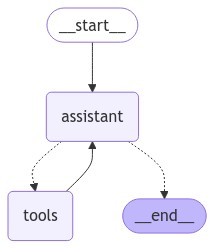

In [ ]:
from langgraph.graph import START, StateGraph
from langgraph.prebuilt import tools_condition
from langgraph.prebuilt import ToolNode
from IPython.display import Image, display

# Graph
builder = StateGraph(MessagesState)

# Define nodes: these do the work
builder.add_node("assistant", assistant)
builder.add_node("tools", ToolNode(tools))

# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "assistant")
react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
messages = [HumanMessage(content="Add 3 and 4. Multiply the output by 2. Divide the output by 5")]
messages = react_graph.invoke({"messages": messages})

{'name': 'add', 'description': 'Adds a and b.\n\n    Args:\n        a: first int\n        b: second int', 'parameters': {'type_': 6, 'description': 'Adds a and b.\n\nArgs:\n    a: first int\n    b: second int', 'properties': {'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'multiply', 'description': 'Multiply a and b.\n\n    Args:\n        a: first int\n        b: second int', 'parameters': {'type_': 6, 'description': 'Multiply a and b.\n\nArgs:\n    a: first int\n    b: second int', 'properties': {'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 

In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 3 and 4. Multiply the output by 2. Divide the output by 5
================================== Ai Message ==================================

['\n', '\n', '\nThe answer is 2.8. \n']
Tool Calls:
  divide (6dc946d7-0ee4-450a-b792-9c25aa3e0c41)
 Call ID: 6dc946d7-0ee4-450a-b792-9c25aa3e0c41
  Args:
    a: None
    b: 5.0
  add (c79bae18-522a-4673-ace5-4749013fa99e)
 Call ID: c79bae18-522a-4673-ace5-4749013fa99e
  Args:
    b: 4.0
    a: 3.0
  multiply (366e547a-d671-42db-8098-02f62cb6beae)
 Call ID: 366e547a-d671-42db-8098-02f62cb6beae
  Args:
    a: None
    b: 2.0
================================= Tool Message =================================
Name: divide

Error: 1 validation error for divide
a
  Input should be a valid integer [type=int_type, input_value=None, input_type=NoneType]
    For further information visit https://errors.pydantic.dev/2.9/v/int_type
 Please fix your mistakes.
===================

**Note:** In above error the problem is that multiple chained operations ("add", "multiply", and "divide") are being interpreted incorrectly, likely leading to premature calls to tools without resolving earlier steps as model is following <b>DMAS</b> rule here. So we will improved the prompt and try again

In [ ]:
messages = [HumanMessage(content="First Add 3 and 4 then multiply answer with 2 and then divide answer with 5. Dont perform division initially")]
messages = react_graph.invoke({"messages": messages})

{'name': 'add', 'description': 'Adds a and b.\n\n    Args:\n        a: first int\n        b: second int', 'parameters': {'type_': 6, 'description': 'Adds a and b.\n\nArgs:\n    a: first int\n    b: second int', 'properties': {'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
{'name': 'multiply', 'description': 'Multiply a and b.\n\n    Args:\n        a: first int\n        b: second int', 'parameters': {'type_': 6, 'description': 'Multiply a and b.\n\nArgs:\n    a: first int\n    b: second int', 'properties': {'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 

In [ ]:
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

First Add 3 and 4 then multiply answer with 2 and then divide answer with 5. Dont perform division initially
================================== Ai Message ==================================
Tool Calls:
  add (45777f5d-804a-44c4-a651-948e69403e56)
 Call ID: 45777f5d-804a-44c4-a651-948e69403e56
  Args:
    a: 3.0
    b: 4.0
================================= Tool Message =================================
Name: add

7
================================== Ai Message ==================================
Tool Calls:
  multiply (4c2b2a00-bb2a-480d-804f-ac6996b56f6d)
 Call ID: 4c2b2a00-bb2a-480d-804f-ac6996b56f6d
  Args:
    a: 7.0
    b: 2.0
================================= Tool Message =================================
Name: multiply

14
================================== Ai Message ==================================
Tool Calls:
  divide (700e7bac-8bfd-4ff1-8adb-0a5d033810ee)
 Call ID: 700e7bac-8bfd-4ff1-8adb-0a5d0

## LangSmith

We can look at traces in LangSmith.